In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


In [94]:
import tensorflow as tf


In [95]:
data=pd.read_csv('../input/digit-recognizer/train.csv')
test=pd.read_csv('../input/digit-recognizer/test.csv')


In [96]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical

X_train = data.iloc[:,1:]
y_train = data.iloc[:,0]
y_train = to_categorical(y_train, 10)


X_train = X_train.values.reshape(-1, 28, 28, 1)/255.
test = test.values.reshape(-1, 28, 28, 1)/255.

In [97]:
X_train.shape

(42000, 28, 28, 1)

In [98]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
from sklearn.model_selection import train_test_split
print(X_train.shape,y_train.shape)

(42000, 28, 28, 1) (42000, 10)


In [100]:
trainData,testData, trainLabels, testLabels=train_test_split(X_train,y_train,test_size=0.2, random_state=0)

In [101]:
print(trainData.shape,trainLabels.shape,testLabels.shape,testData.shape)

(33600, 28, 28, 1) (33600, 10) (8400, 10) (8400, 28, 28, 1)


In [102]:

	
def ModelConv(width, height, depth, classes):
    # initialize the model
	model = Sequential()
	inputShape = (height, width, depth)
	# first set of CONV => RELU => POOL layers
	model.add(Conv2D(32, (5, 5), padding="same",
	input_shape=inputShape))
	model.add(Activation("relu"))
	model.add(MaxPooling2D(pool_size=(2, 2)))
		# second set of CONV => RELU => POOL layers
	model.add(Conv2D(32, (3, 3), padding="same"))
	model.add(Activation("relu"))
	model.add(MaxPooling2D(pool_size=(2, 2)))
		# first set of FC => RELU layers
	model.add(Flatten())
	model.add(Dense(64))
	model.add(Activation("relu"))
	model.add(Dropout(0.5))
		# second set of FC => RELU layers
	model.add(Dense(64))
	model.add(Activation("relu"))
	model.add(Dropout(0.5))
		# softmax classifier
	model.add(Dense(classes))
	model.add(Activation("softmax"))
		# return the constructed network architecture
	return model

In [106]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,MaxPooling2D,Dense,Conv2D,Flatten,Dropout
INIT_LR = 1e-3
EPOCHS = 30
BS = 32
opt = Adam(lr=INIT_LR)
model=ModelConv(28,28,1,10)

model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
activation_40 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_41 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1568)             

In [107]:
history = model.fit(
	trainData, trainLabels,
	validation_data=(testData, testLabels),
	batch_size=BS,
	epochs=EPOCHS,
	verbose=1)

Epoch 1/30
1050/1050 [==============================] - 18s 18ms/step - loss: 0.7296 - accuracy: 0.7539 - val_loss: 0.1103 - val_accuracy: 0.9710
Epoch 2/30
1050/1050 [==============================] - 18s 18ms/step - loss: 0.3023 - accuracy: 0.9061 - val_loss: 0.0727 - val_accuracy: 0.9798
Epoch 3/30
1050/1050 [==============================] - 19s 18ms/step - loss: 0.2300 - accuracy: 0.9277 - val_loss: 0.0580 - val_accuracy: 0.9823
Epoch 4/30
1050/1050 [==============================] - 18s 18ms/step - loss: 0.2020 - accuracy: 0.9365 - val_loss: 0.0563 - val_accuracy: 0.9837
Epoch 5/30
1050/1050 [==============================] - 18s 17ms/step - loss: 0.1752 - accuracy: 0.9448 - val_loss: 0.0475 - val_accuracy: 0.9871
Epoch 6/30
1050/1050 [==============================] - 19s 19ms/step - loss: 0.1625 - accuracy: 0.9467 - val_loss: 0.0627 - val_accuracy: 0.9840
Epoch 7/30
1050/1050 [==============================] - 19s 18ms/step - loss: 0.1487 - accuracy: 0.9521 - val_loss: 0.0432 -

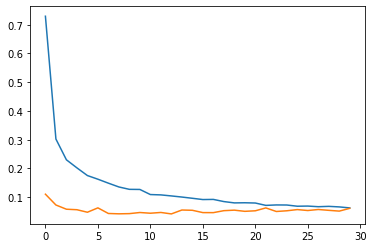

In [108]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)

In [109]:
results = model.predict(test)

In [110]:

results = np.argmax(results, axis=1)
results = pd.Series(results, name='Label')
submission = pd.concat([pd.Series(range(1,28001), name='ImageID'), results], axis=1)
submission.to_csv('submission.csv', index=False)